In [2]:
#Importing...

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


#Reading the .mat file

mat_contents = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex3\ex3\ex3data1.mat')

mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
#Taking matrix X and Y
X = mat_contents['X']
print(X)

Y = mat_contents['y']
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [4]:
#initialising some values...

#m: no. of data sets
#n: no. of features
m,n = X.shape
print(m,n)

#taking the width
example_width = round(n**0.5)

print(example_width)

print()

5000 400
20



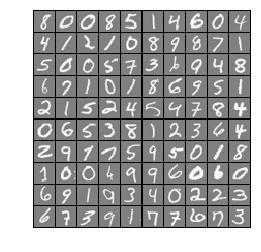

AxesImage(112.68,36;217.44x217.44)
[[-1. -1. -1. ... -1. -1. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 ...
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [15]:
#VISUALIZING THE DATA

#taking random permutation of the data set
random = np.random.permutation(m)

#now taking the random 100 data sets
sel = X[random[0:100],:]


#displaying the data
def displayData(X,example_width):
    plt.close()
    plt.figure()
    plt.set_cmap('gray')#setting the color to gray
    
    m,n = X.shape
    
    #taking the height
    example_height = int(n/example_width)
    
    #no. of rows and columns
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols =int(math.ceil(m/display_rows))
    
    pad = 1
    
    display_array = -np.ones((pad + display_rows * (example_height + pad),pad + display_cols * (example_width + pad)))
    
    curr_ex = 1
    
    for i in range(1,display_rows+1):
        for j in range(1,display_cols+1):
            if curr_ex > m:
                break
            
            max_val = max(abs(X[curr_ex-1,:]))
            
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width + pad) + np.array(range(example_width))
            
            display_array[rows[0]:rows[-1]+1,cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :],(example_height, example_width),order = 'F') / max_val
            curr_ex += 1
        
        if curr_ex > m:
            break
    
    h = plt.imshow(display_array,vmin = -1,vmax = 1)
    
    plt.axis('off')
    plt.show(block = False)
    
    return h,display_array

a,b = displayData(sel,int(example_width))
print(a)
print(b)


In [311]:
#VECTORIZING LOGISTIC REGRESSION

In [312]:
#For testing the vectorized logistic regression

#theta
theta_t = np.array([[-2],[-1],[1],[2]])


#Matrix X
a = [i/10 for i in range(1,16)]
b = np.array(a).reshape((3,5))
c = np.ones((1,5))

X_t = np.concatenate((c,b),axis = 0).transpose()
print(X_t)


#Matrix Y
Y_t = np.array([[1],[0],[1],[0],[1]])

print(Y_t)


[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]
[[1]
 [0]
 [1]
 [0]
 [1]]


In [313]:
def sigmoid(z):
    
    #IF z IA AN ARRAY
    if isinstance(z,np.ndarray):
        temp = np.zeros(z.shape)
       
        temp = 1/(1 + np.exp(-z))
        
        return temp
   
    #IF z IS A LIST
    elif isinstance(z,list):
        for i in range(len(z)):
            z[i] = 1/(1 + np.exp(-z[i]))
        return z
    
    #IF z IS A NO.   
    else:
        return 1/(1 + np.exp(-z))
                
            
    
a = np.array([[1,2],[0,0],[4,0]])
#print(a)
print(sigmoid(a))
#print(sigmoid(78.02469282 ))
#print(X)
#print(sigmoid(X))

[[0.73105858 0.88079708]
 [0.5        0.5       ]
 [0.98201379 0.5       ]]


In [314]:
#calculating the cost function
def costFunction(theta,Xmapped,Y,Lambda):
    
    #no. of dataset and features for the testing data
    m,n = Y.shape
    
    #first term of a cost function ylog(h(x))
    firstTerm = ((Y.transpose()).dot(np.log(sigmoid(Xmapped.dot(theta)))))
    
    #second term of a cost function (1-y)log(1-h(x))
    secondTerm = ((1-Y).transpose()).dot(np.log(1-sigmoid((Xmapped.dot(theta)))))
   
    #creating third term : lambda.theta^2/2m
    """We had minus the theta[0] here because we do not have to include theta[0]
                                                because loop starts from the 1 & theta[0] is not inluded in regularized
                                                parameter"""
    thirdTerm = (Lambda/(2*m))*(((theta**2).sum()) - theta[0]**2)
    return  (thirdTerm - (((firstTerm+secondTerm))/m))
    
    
#FOR GRADIENT
    
def Gradient(theta,Xmapped,Y,Lambda):
    
    #no. of dataset and features for the testing data
    m,n = Y.shape
    
    #storing the value of theta[0] so that it will not be change by (lambda/m)*theta[0]
    theta0 = theta[0]
    
    #performing the gradient over all theta
    theta = (((Xmapped.transpose()).dot(sigmoid(Xmapped.dot(theta))-Y)/m)) +(Lambda/m)*theta
    
    #since in theta[0] extra term (lambda/m)*theta[0] is added so we have to subtract from it
    theta[0] = theta[0] - (Lambda/m)*theta0

    
    # returning the total cost and gradient
    return theta


cost = costFunction(theta_t,X_t,Y_t,lambda_t)
grad = Gradient(theta_t,X_t,Y_t,lambda_t)

print('Cost : ',float(cost))

print('Lambda : ',lambda_t)

print('gradient : ',grad)

Cost :  2.534819396109744
Lambda :  3
gradient :  [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]
